REGIONES CONECTIVIDAD Y FRONTERAS

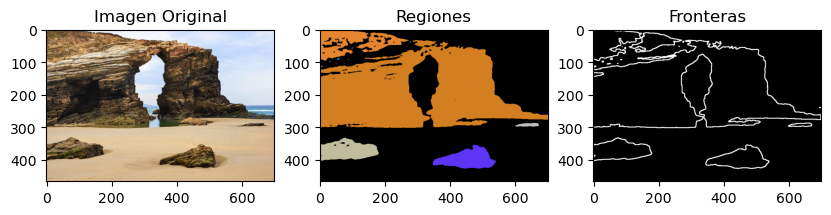

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('2.png')
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 8)
_,binarizado = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#Regiones
cant, region = cv2.connectedComponents(binarizado)

colores = np.random.randint(0, 255, size=(cant, 3), dtype=np.uint8)
colores[0] = 0, 0, 0
color_region = colores[region]

#Fronteras
contorno,_ = cv2.findContours(binarizado, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
lineas = cv2.drawContours(np.zeros_like(gray), contorno,-1, 255, 2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Regiones')
plt.imshow(color_region)

plt.subplot(1, 3, 3)
plt.title('Fronteras')
plt.imshow(lineas, cmap='gray')

plt.show()


DISTANCIAS

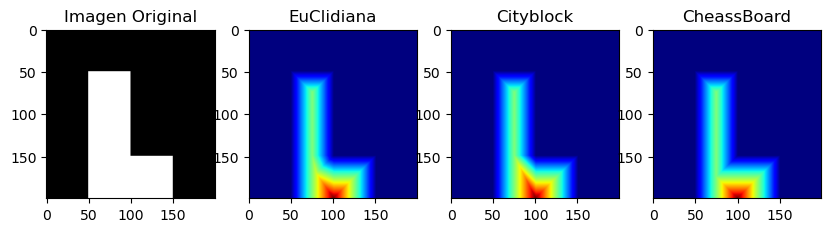

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((200,200),dtype=np.uint8)
img[50:150, 50:100] = 1
img[150:250, 50:150] = 1 


def distancia (img_binarizada):
    invertir = 1-img_binarizada

    #euClidiana
    dist_eucli = cv2.distanceTransform(img_binarizada, cv2.DIST_L2, 3)

    #Cityblock
    dist_city = cv2.distanceTransform(img_binarizada, cv2.DIST_L1, 3)

    #CheassBoard
    dist_chess = cv2.distanceTransform(img_binarizada, cv2.DIST_C, 3)

    return dist_eucli, dist_city, dist_chess



eucli, city, chess = distancia(img)


def normalizar(dist):
    return cv2.normalize(dist, None,0, 255, cv2.NORM_MINMAX).astype(np.uint8)

norma_eucli = normalizar(eucli)
norma_city = normalizar(city)
norma_chess = normalizar(chess)

plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('EuClidiana')
plt.imshow(norma_eucli, cmap='jet')

plt.subplot(1, 4, 3)
plt.title('Cityblock')
plt.imshow(norma_city, cmap='jet')

plt.subplot(1, 4, 4)
plt.title('CheassBoard')
plt.imshow(norma_chess, cmap='jet')


plt.show()





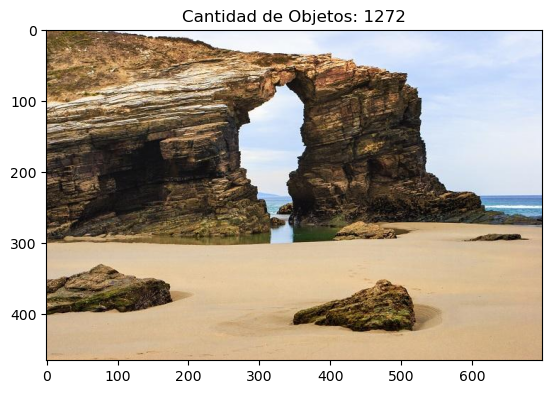

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def contar(imagen):
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGRA2GRAY)
    _, binarizar = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    etiquetar = measure.label(binarizar, connectivity=2)  # 2 = 4 vecinos y 1 = 8 vecinos
    num = np.max(etiquetar)

    return num

imagen = cv2.imread('2.png')
contarr = contar(imagen)

plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title(f'Cantidad de Objetos: {contarr}')

plt.show()


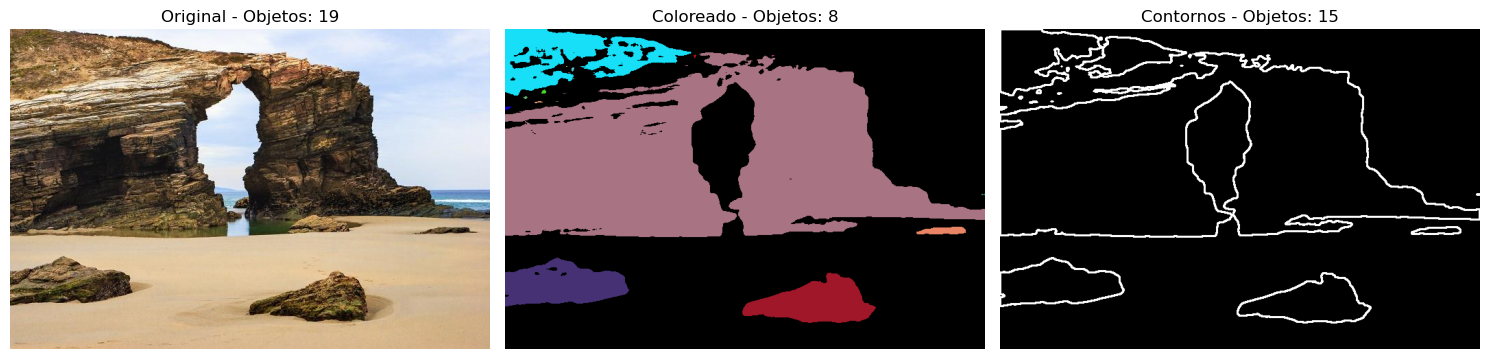

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

imagen = cv2.imread('2.png')

gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 8)
_, binarizado = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

cant, region = cv2.connectedComponents(binarizado)

colores = np.random.randint(0, 255, size=(cant, 3), dtype=np.uint8)
colores[0] = 0, 0, 0  
color_region = colores[region]

contorno, _ = cv2.findContours(binarizado, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
lineas = cv2.drawContours(np.zeros_like(gray), contorno, -1, 255, 2)

def contar(imagen):
    if len(imagen.shape) == 3:  # Si es una imagen en color
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    _, binarizar = cv2.threshold(imagen, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    etiquetas = measure.label(binarizar, connectivity=2)
    num = np.max(etiquetas)
    return num

contarr = contar(binarizado)
contarr1 = contar(color_region)
conttarr2 = contar(lineas)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title(f'Original - Objetos: {contarr}')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Coloreado - Objetos: {contarr1}')
plt.imshow(color_region)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Contornos - Objetos: {conttarr2}')
plt.imshow(lineas, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


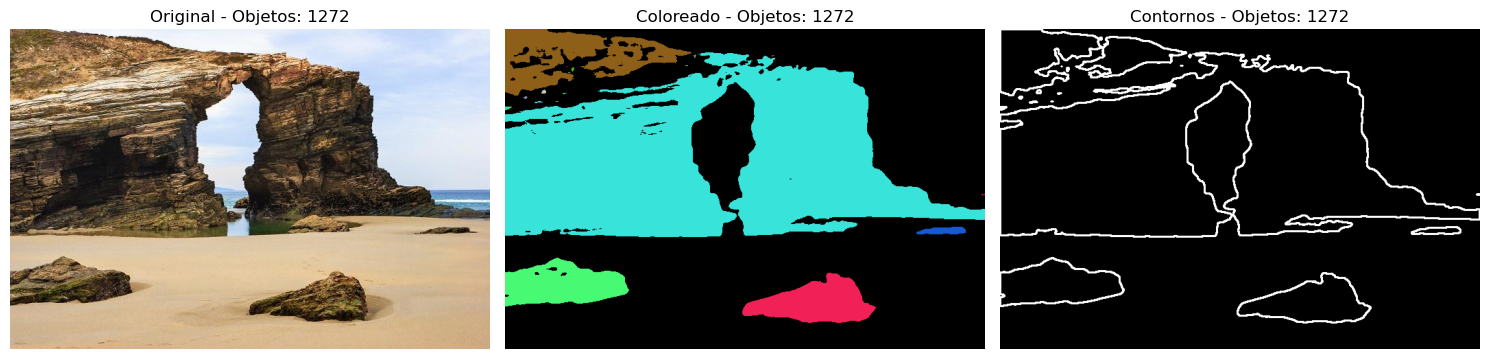

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

imagen = cv2.imread('2.png')
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 8)
_, binarizado = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#Regiones
cant, region = cv2.connectedComponents(binarizado)

colores = np.random.randint(0, 255, size=(cant, 3), dtype=np.uint8)
colores[0] = 0, 0, 0  
color_region = colores[region]

#Fronteras
contorno, _ = cv2.findContours(binarizado, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
lineas = cv2.drawContours(np.zeros_like(gray), contorno, -1, 255, 2)

def contar(imagen):
    _, binarizar = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    etiquetas = measure.label(binarizar, connectivity=2)
    num = np.max(etiquetas)

    return num


contarr = contar(imagen)
contarr1 = contar(color_region)
conttarr2 = contar(lineas)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title(f'Original - Objetos: {contarr}')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f'Coloreado - Objetos: {contarr1}')
plt.imshow(color_region)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Contornos - Objetos: {conttarr2}')
plt.imshow(lineas, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


ETIQUETADO

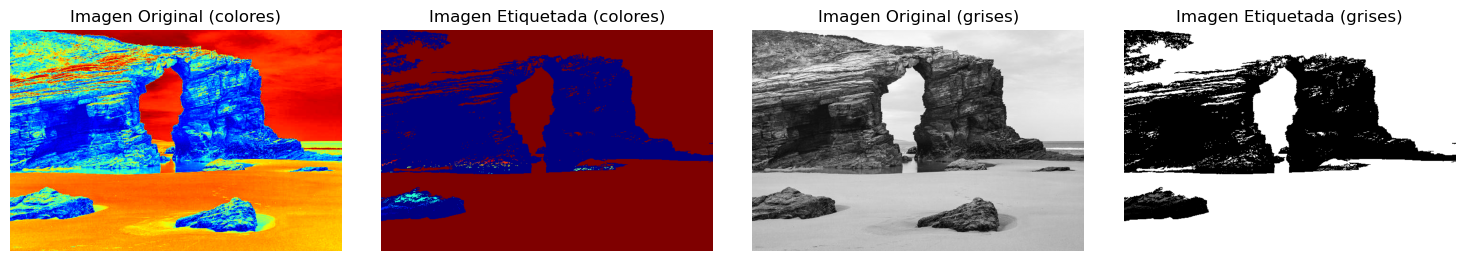

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def etiquetar(img):
    # Umbralizado binario
    _, imgBin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    # Encontrar contornos externos
    contornos, _ = cv2.findContours(imgBin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_etiquetada = np.zeros_like(img, dtype=np.uint8)
    for i, contorno in enumerate(contornos):
        cv2.drawContours(img_etiquetada, [contorno], -1, (i+1), -1)  
    return img_etiquetada

img = cv2.imread('2.png', 0)

imagen_etiquetada = etiquetar(img)

plt.figure(figsize=(15, 5))

plt.subplot(2, 4, 1)
plt.title('Imagen Original (colores)')
plt.imshow(img, cmap='jet')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Imagen Etiquetada (colores)')
plt.imshow(imagen_etiquetada, cmap='jet')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Imagen Original (grises)')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Imagen Etiquetada (grises)')
plt.imshow(imagen_etiquetada, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


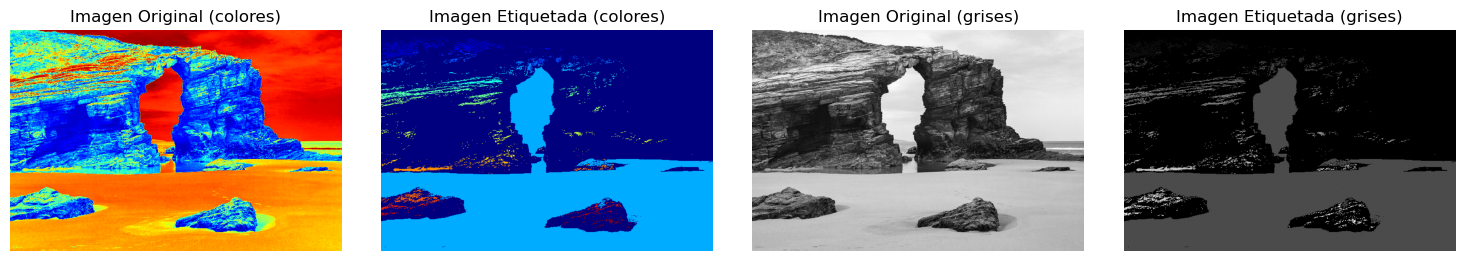

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

img_gray = cv2.imread('2.png',0)
# Umbralizado binario
_, imgBin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img_eti = measure.label(imgBin,connectivity=1) #Ocho vecinos

plt.figure(figsize=(15, 5))

plt.subplot(2, 4, 1)
plt.title('Imagen Original (colores)')
plt.imshow(img_gray, cmap='jet')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Imagen Etiquetada (colores)')
plt.imshow(img_eti, cmap='jet')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Imagen Original (grises)')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Imagen Etiquetada (grises)')
plt.imshow(img_eti, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


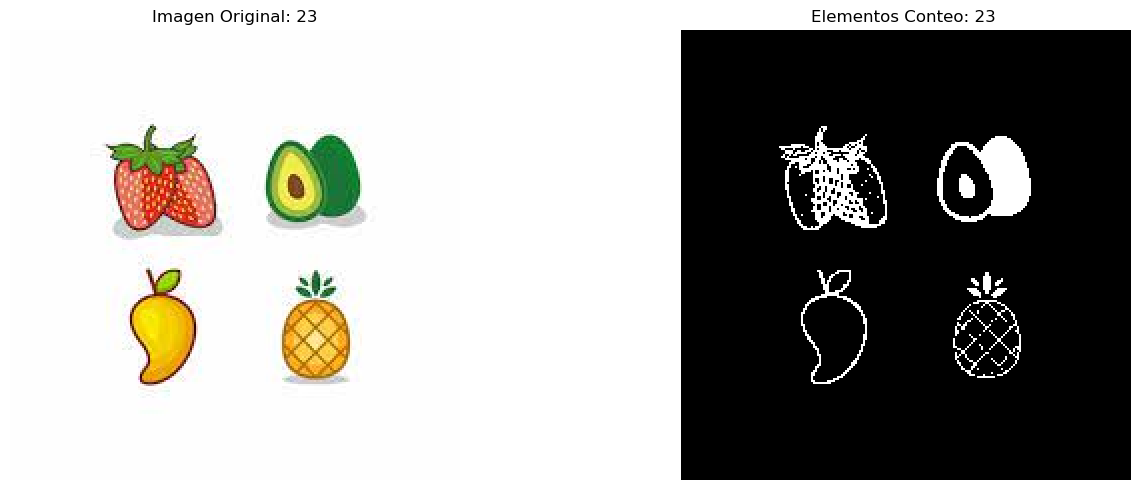

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

def contar(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binaria = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    borde,_ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(borde)
    return cont, binaria



imagen = cv2.imread('C1.png')
img_cont, bin = contar(imagen)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title(f'Imagen Original: {img_cont}')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Elementos Conteo: {img_cont} ')
plt.imshow(bin, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


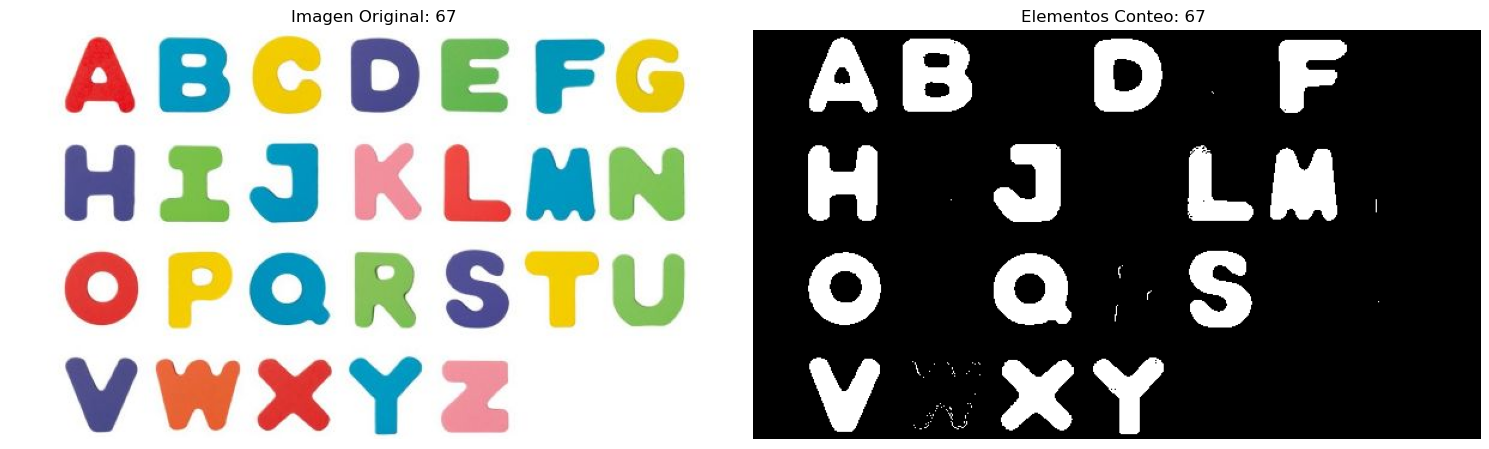

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure


def contar2(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,binarizada = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
    contorno = measure.label(binarizada, connectivity=2)
    cont = np.max(contorno)
    return cont, binarizada

imagen = cv2.imread('C5.png')
contado, bin = contar2(imagen)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title(f'Imagen Original: {contado}')
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'Elementos Conteo: {contado} ')
plt.imshow(bin, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()